#Evaluación		Introducción	a	la	Visión	Computacional

Profesora:  Ph.D Daniela Opitz

Alumnos: Andrea Faúndez - Israel Diaz

Fecha de entrega: 14/01/2020

**1. El archivo imagenes1.zip contiene seis imágenes con los canles R, G, B, separados y desalineados.**

**1.1 Cree una función que reciba la lista de imágenes y las visualice sin ningún procesamiento previo y utilícela para explorar las imágenes a recortar y alinear. Todas las imágenes deben ser desplegadas en el mismo gráfico.**

In [1]:
#Se importa librería y directorio para trabajar en Google Colab
from google.colab import drive
drive.mount('/content/gdrive')
#Se importan librerías necesarias
from imutils import paths, build_montages
from matplotlib import pyplot as plt
from PIL import Image
from os import scandir, getcwd
import cv2
import os
import numpy as np
#magic para generar plots en el mismo documento
%matplotlib inline 

Mounted at /content/gdrive


In [ ]:
#Ruta donde se almacenan: archivo notebook .ipynb, carpeta images1, carpeta images1_jpg, carpeta images2, carpeta images3
path_data = '/content/gdrive/My Drive/Colab Notebooks/TU CARPETA'

In [ ]:
def show_images(path):
  '''
  Recibe la ruta donde se alojan las imágenes, no
  retorna nada, sino que genera la visualización 
  de las imágenes de esa ruta.
  '''
  figura = plt.figure(figsize=(12,9)) 
  imagePaths = list(paths.list_images(path))
  try:
    for i in range (len(imagePaths)):
      plt.subplot(1, len(imagePaths), i+1)
      image = cv2.imread(imagePaths[i])
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      plt.title(imagePaths[i][-5:])
      plt.tight_layout()
      plt.imshow(image)
  except:
    print('Ha habido un error en la carga de imágenes')

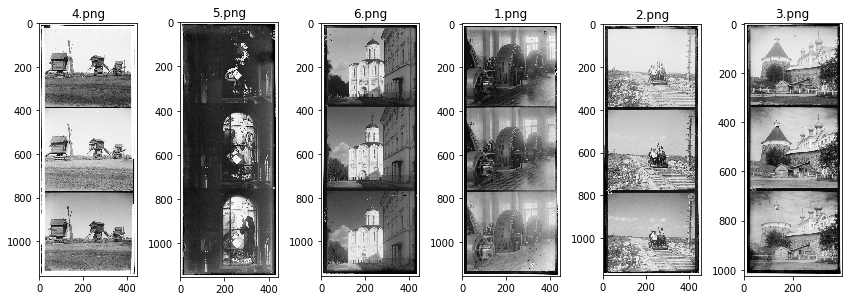

In [ ]:
show_images(path_data+'/images1')

**1.2 Cree una función que corte cada imagen en tres para obtener los canales R, G y B y los combine para obtener una imagen a color sin utilizar técnicas para alinear los canales.**


In [ ]:
imagePaths1 = list(paths.list_images(path_data+'/images1'))
imagePaths1

['/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/images1/4.png',
 '/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/images1/5.png',
 '/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/images1/6.png',
 '/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/images1/1.png',
 '/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/images1/2.png',
 '/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/images1/3.png']

In [ ]:
# FUNCION DE CORTE DE IMAGENES
def cut_img(img):
  '''
  Recibe una imagen y la transforma en escala de grises.
  '''
  #
  im =  cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  #calcular alto de imagen en base al alto de la del archivo
  #dado que en el alto del archivo hay 3 imagenes se divide entre 3 el alto total
  size = im.shape
  height = int(size[0] / 3)
  width = size[1]
  #Cortado de imagen
  ##Crea una array de zeros en tres canales 
  #luego se sustituirán los datos de los canales para crear la imagen a color
  im_color = np.zeros((height,width,3), dtype=np.uint8 )
  im_aligned = np.zeros((height,width,3), dtype=np.uint8 )
  for i in range(0,3):
      im_color[:,:,i] = im[i*height:(i+1) * height,:]
  return im_color

In [ ]:
def show_cutimg(imglist):
  '''
  Recibe imagenes en un array y genera la visualización 
  en una columna.
  '''
  #plt.figure(figsize=(18,10)) 
  for i in range (len(imglist)):
    cv2.imwrite(path_data+"/images1_jpg/"+imglist[i][-5]+".jpg", cut_img(imglist[i]))
  #imlist = list(paths.list_images(path_data+'/images1_jpg'))
  #image = cv2.cvtColor(imlist[i], cv2.COLOR_BGR2RGB) #se incluye la función de corte de imagenes para que lo realice de forma automática
  show_images(path_data+"/images1_jpg");

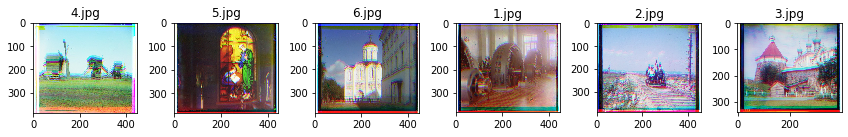

In [ ]:
show_cutimg(imagePaths1)

**1.3. Cree una función que retorne las imágenes a color alineadas lo mejor posible. Si remueve los bordes, alinear las imágenes será más sencillo.**

In [ ]:
def alinear(img):
  '''
  Recibe una imagen, utiliza las funciones de corte,
  transformación a esala de grises y realiza alieación
  de la imagen.
  '''
  # lee la imagen de la ruta y la transforma en escala de grises
  im_grey =  cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  # recorta los bordes de la imagen hasta el tamaño deseado
  im_grey = im_grey[30:-30, 30:-30]
  # calcular alto de imagen en base al alto de la del archivo
  # dado que en el alto del archivo hay 3 imagenes se divide entre 3 el alto total
  size = im_grey.shape
  height = int(size[0] / 3);
  width = size[1]
  # CORTADO DE IMAGEN
  # Crea una array de zeros en tres canales 
  # luego se sustituirán los datos de los canales para crear la imagen a color
  im_color = np.zeros((height,width,3), dtype=np.uint8 )
  for i in range(0,3):
      im_color[:,:,i] = im_grey[i*height:(i+1) * height,:]
  # Se define la funcion gradiente
  def get_gradient(im) :
    #Calcula los gradiente x e y usando el operador Sobel
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    #Combina los dosgradientes
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad
  # Creamos un arreglo para guardar los gradientes
  im_color_grad = np.zeros((height,width,3), dtype=np.uint8 )
  for i in range(0,3):
      im_color_grad[:,:,i]=get_gradient(im_color[:,:,i])
  # ALINEACIÓN DE IMAGENES:
  # El canal rojo es el ancho de la imagen,
  # Los canales azul y verde seran alineados al canal rojo
  im_aligned_2 = np.zeros((height,width,3), dtype=np.uint8 )
  im_aligned_2[:,:,2] = im_color[:,:,2]
  # Definimos un modelo, para este caso se utlizará MOTION_HOMOGRAPHY
  warp_mode = cv2.MOTION_HOMOGRAPHY
  if warp_mode == cv2.MOTION_HOMOGRAPHY:
      warp_matrix = np.eye(3, 3, dtype=np.float32)
  else:
      warp_matrix = np.eye(2, 3, dtype=np.float32)
  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10) #define donde se detendrá el algoritmo
  # Se alinea respecto al color rojo
  # Para ello se utiliza el gradiente 
  for i in range(0,2):
      (cc, warp_matrix) = cv2.findTransformECC (im_color_grad[:,:,2], im_color_grad[:,:,i], warp_matrix, warp_mode, criteria, None, 1)
      if warp_mode == cv2.MOTION_HOMOGRAPHY :
          #Usa Perspecive si es una Homografía
          im_aligned_2[:,:,i] = cv2.warpPerspective (im_color[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
      else:
          # Usa Affine si no es una Homografía.
          im_aligned_2[:,:,i] = cv2.warpAffine(im_color[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
  size = im_aligned_2.shape
  im_aligned_2 = im_aligned_2[int(size[0]*0.07):int(size[0]*0.93) , int(size[1]*0.06):int(size[1]*0.94)]
  return im_aligned_2

In [ ]:
# FUNCION PARA MOSTRAR EL ARRAY DE IMAGENES CON CALANES ALINEADOS
def show_alignimg(imglist):
  '''
  Recibe la lista de imagenes en un arreglo, alinea los canales
  llamando a la función alinear y genera la visualización de las
  imágenes en una columna.
  '''
  plt.figure(figsize=(18,9)) 
  for i in range (len(imglist)):
    plt.subplot(1, len(imglist), i+1)
    image = cv2.cvtColor(alinear(imglist[i]), cv2.COLOR_BGR2RGB)
    plt.title(imglist[i][-5:])
    plt.tight_layout()
    plt.imshow(image)

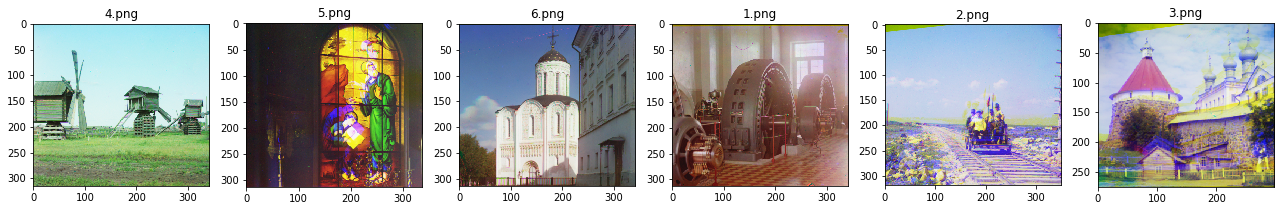

In [ ]:
# Muestar el resultado de la alineación de canales. 
show_alignimg(imagePaths1)

**2. El	archivo	imagenes2.zip	contiene 129 imágenes	de	futbolistas	famosos.	Hay	N	futbolistas	diferentes donde N	es	desconocido	y	N	es	menor a 129. Esto significa que hay varias imágenes para el mismo futbolista. Clusterice el set de imágenes y asígnele un ID siguiendo los siquientes pasos.**

**2.1 Use la librería face_recognition, detecte las caras en cada imagen y genere un vector de características	para cada cara. Entregue un archivo que describa el nombre de la imagen, la localización de la cara y el vector de características.**


In [ ]:
#!pip install https://pypi.python.org/packages/da/06/bd3e241c4eb0a662914b3b4875fc52dd176a9db0d4a2c915ac2ad8800e9e/dlib-19.7.0-cp36-cp36m-win_amd64.whl#md5=b7330a5b2d46420343fbed5df69e6a3f
!pip install cmake
!pip install face_recognition
import face_recognition
from time import sleep
import pickle

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=7948209aa0c01bf1346552c6c21fd9723c9688838f7ce45b3d1973aab43bcccd
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
def file_generator(path, filename):
  '''
  Recibe la ruta donde se alojan las imágenes y el nombre del archivo
  que será generado. Éste archivo contendrá el nombre de cada imagen,
  la localización de la cara de cada imagen y el vector de 
  características de cada imagenes de la ruta dada.
  '''
  imagePaths = list(paths.list_images(path))
  datos = []
  try:
    for (i, imagePath) in enumerate(imagePaths):
      #Se muestra el avance del procesamiento de las imágenes
      print("Procesando imagen {}/{}".format(i+1,len(imagePaths)))
      image = cv2.imread(imagePath)
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      boxes = face_recognition.face_locations(rgb,model='cnn') #Detectando las caras
      
      #Crea los vectores de características y los guarda en la variable encodings
      encodings = face_recognition.face_encodings(rgb, boxes)

      #A continuación, se construye un diccionario con en el nombre de la imagen,
      #la localización de la cara en la imagen y el vector de características
      #generado previamente 
      d = [{"nombre_imagen": imagePath, 
            "localizacion_cara": box, 
            "vector_caracteristicas": enc}
            for (box, enc) in zip(boxes, encodings)]
      datos.extend(d)
      sleep(2)

    # Se guarda el diccionario con los datos anteriores en un formato donde no 
    #importa la serialización, se guarda en un archivo cuyo nombre debe ser 
    #entregado por parámetro a la función.
    f = open('/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/'+filename, "wb")
    f.write(pickle.dumps(datos))
    f.close()
    print('Se generó archivo {}'.format(filename))
  except:
    print('error')


In [ ]:
file_generator(path_data+'/images2','/encodings2.txt')

Procesando imagen 1/129
Procesando imagen 2/129
Procesando imagen 3/129
Procesando imagen 4/129
Procesando imagen 5/129
Procesando imagen 6/129
Procesando imagen 7/129
Procesando imagen 8/129
Procesando imagen 9/129
Procesando imagen 10/129
Procesando imagen 11/129
Procesando imagen 12/129
Procesando imagen 13/129
Procesando imagen 14/129
Procesando imagen 15/129
Procesando imagen 16/129
Procesando imagen 17/129
Procesando imagen 18/129
Procesando imagen 19/129
Procesando imagen 20/129
Procesando imagen 21/129
Procesando imagen 22/129
Procesando imagen 23/129
Procesando imagen 24/129
Procesando imagen 25/129
Procesando imagen 26/129
Procesando imagen 27/129
Procesando imagen 28/129
Procesando imagen 29/129
Procesando imagen 30/129
Procesando imagen 31/129
Procesando imagen 32/129
Procesando imagen 33/129
Procesando imagen 34/129
Procesando imagen 35/129
Procesando imagen 36/129
Procesando imagen 37/129
Procesando imagen 38/129
Procesando imagen 39/129
Procesando imagen 40/129
Procesand

**2.2 Utilice	los	vectores	de	características	para	agrupar	las	caras	de los	futbolistas	utilizando	el	algoritmo	DBSCAN.	Cada	grupo corresponderá a un futbolista. Si usted conoce a los futbolistas puede reemplazar los típicos IDS generados (0,1,2,3 ...) por sus nombres.**

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
data2 = pickle.loads(open(path_data+'/encodings2.txt', "rb").read())
data2 = np.array(data2)
encodings2 = [d2["vector_caracteristicas"] for d2 in data2]
print("Caras detectadas:", len(data2))

Caras detectadas: 127


In [ ]:
dbsc2 = DBSCAN().fit(encodings2)##(eps = .5, min_samples = 15)
clusters2 = np.unique(dbsc2.labels_)
for i in range(len(data2)):
  data2[i]['cluster'] = dbsc2.labels_[i]

In [ ]:
def show_image(image_path):
  '''
  Recibe el nombre de un archivo imagen y
  genera la visualización de la imagen.
  '''
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  figura = plt.imshow(image)
  #figura.axes.get_xaxis().set_visible(False)
  #figura.axes.get_yaxis().set_visible(False)
  plt.title(image_path[-12:])
  

**2.3 Indique cuántos futbolistas distintos (número de clústeres) hay en el dataset.**

In [ ]:
n_clusters2 = len(set(clusters2)-{-1})
print("Cantidad de futbolistas en el dataset: {}".format(n_clusters2))

Cantidad de futbolistas en el dataset: 5


**2.4. Genere	una	forma	de	visualizar	los	clústeres.	Para	esto	extraiga	cada	cara	de	cada	imagen	y	despliéguela	en	grupo.	Despliegue	hasta	un	máximo	de	9	caras	por	grupo,	ignore el resto. Cambie el tamaño de las imágenes para visualizar inteligentemente. Recuerde que en archivo generado en 2.1 existe esa información.**

In [ ]:
def view_cluster(data, cluster, algorithm, cluster_names):
  '''
  Recibe el id del cluster, el algoritmo de
  clusterización utilizado y genera la visualización
  de 9 imágenes al azar del cluster.
  '''
  image_cluster = np.where(algorithm.labels_ == cluster)[0]
  image_selecction = np.random.choice(image_cluster, size=min(9, len(image_cluster)),replace=False)
  faces_cluster = []
  for i in image_selecction:
    image = cv2.imread(data[i]["nombre_imagen"])
    (arr, der, aba, izq) = data[i]["localizacion_cara"]
    face = image[arr:aba, izq:der]
    face = cv2.resize(face, (150, 150))
    faces_cluster.append(face)
  show_faces = build_montages(faces_cluster, (150, 150), (len(faces_cluster), 1))[0]
  show_clusters = cv2.cvtColor(show_faces, cv2.COLOR_BGR2RGB)
  title = cluster_names[cluster]
  figura = plt.imshow(show_clusters)
  figura.axes.get_xaxis().set_visible(False)
  figura.axes.get_yaxis().set_visible(False)
  plt.title(title)
  plt.show()

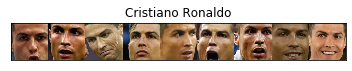

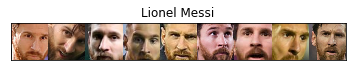

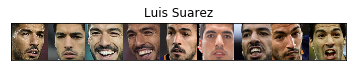

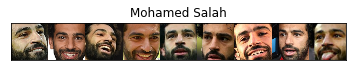

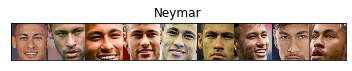

In [ ]:
cluster_names2 = {-1:'Outlier',
                   0:'Cristiano Ronaldo',
                   1:'Lionel Messi',
                   2:'Luis Suarez',
                   3:'Mohamed Salah',
                   4:'Neymar'}
for cluster in clusters2:
  if cluster > -1:       
    view_cluster(data2, cluster,dbsc2,cluster_names2)

**2.5. En	el	set	de	imágenes	hay	un	futbolista	que	no	podrá	ser	identificado porque no pertenecerá a ningún clúster (outlier). Despliegue su cara.**

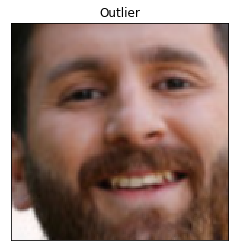

In [ ]:
view_cluster(data2,-1,dbsc2, cluster_names2)

**2.6. Usted	puede	generar	su	propio	set	de	datos.	Si	en	vez	de	utilizar	el	set	de	datos	entregado	en	clases	genera	su	propio set de imágenes reemplazando la categoría de futbolista con políticos, actores en diferentes circunstancias recibirá puntuación extra.**

In [ ]:
file_generator(path_data+'/images3','encodings3.txt')
data3 = pickle.loads(open('/content/gdrive/My Drive/Colab Notebooks/Evaluacion_Final/encodings3.txt', "rb").read())
data3 = np.array(data3)
encodings3 = [d3["vector_caracteristicas"] for d3 in data3]
print("Cantidad de caras detectadas:", len(data3))

dbsc3 = DBSCAN(eps = 0.6).fit(encodings3)##(eps = .5, min_samples = 15)
clusters3 = np.unique(dbsc3.labels_)
for i in range(len(data3)):
  data3[i]['cluster3'] = dbsc3.labels_[i]
print('Cantidad de personajes (sin outliers): ',len(np.ndarray.tolist(clusters3)[1:]))

Procesando imagen 1/17
Procesando imagen 2/17
Procesando imagen 3/17
Procesando imagen 4/17
Procesando imagen 5/17
Procesando imagen 6/17
Procesando imagen 7/17
Procesando imagen 8/17
Procesando imagen 9/17
Procesando imagen 10/17
Procesando imagen 11/17
Procesando imagen 12/17
Procesando imagen 13/17
Procesando imagen 14/17
Procesando imagen 15/17
Procesando imagen 16/17
Procesando imagen 17/17
Se generó archivo encodings3.txt
Cantidad de caras detectadas: 16
Cantidad de personajes (sin outliers):  3


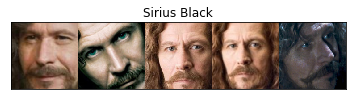

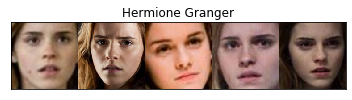

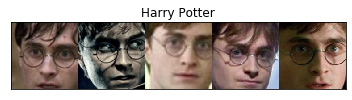

In [ ]:
cluster_names3={-1:'Outlier', 0:'Sirius Black', 1:'Hermione Granger', 2:'Harry Potter'}
for cluster in clusters3:
  if cluster > -1:       
    view_cluster(data3,cluster,dbsc3,cluster_names3)

In [ ]:
view_cluster(data3,-1,dbsc3, cluster_names3)

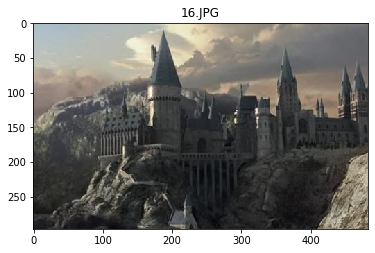

In [ ]:
print('Imagen sin cara')
imagePaths3 = list(paths.list_images(path_data+'/images3'))
image = cv2.imread(imagePaths3[-1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(imagePaths3[-1][-6:])
plt.imshow(image);